# 1. 데이터 전처리와 EDA(탐색적 데이터 분석)
## 1) 데이터 전처리란?
* 분석할 데이터 원본을 머신러닝 및 딥러닝을 할 수 있도록 준비하는 과정
  * 데이터 타입 변환(문자/숫자) 
  * 결측값 처리 - 삭제/대치
  * 이상값 탐지 - 표준편차 3%이하 97%이상 되는 값들, 4분위수 25% - IQR*1.5 미만이거나 75% + IQR * 1.5 초과인 값
  * 구간화
  * 정규화/표준화
  * 카테고리 변수(범주형) 레이블 인코딩(더미변수화, 원핫인코딩)
  * 종속변수의 클래스 편향 수정(클래스 불균형 문제 해결)
  * EDA를 통한 특성 생성 및 삭제

## 2) 데이터 전처리는 머신러닝을 통해 도출되는 모델의 성능에 직접적인 영향을 끼치는 중요요소
* Garbage in Garbage out

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [104]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")

In [105]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 데이터 전처리 없이 분석을 시도할 경우 생기는 일

In [107]:
data2 = data.copy()

In [108]:
X2 = data2.drop('Survived', axis=1) # 독립변수를 만들기 위해 Target(종속변수) 삭제 후 X2에 저장
y2 = data2['Survived'] # 종속 변수만 y에 저장

In [109]:
X2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
y2.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [111]:
y2.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


## 홀드아웃(훈련데이터 / 테스트 데이터로 나눔) 8 : 2

In [112]:
X_train2, X_text2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=77)

In [113]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 32 to 727
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          570 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        167 non-null    object 
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [114]:
# from sklearn.metrics import accuracy_score
# model2 = DecisionTreeClassifier(max_depth=3, random_state=7)
# model2.fit(X_train2, y_train2)
# pred2 = model2.predict(X_test2)
# pirnt(accuracy_score(y_test2,pred2))

In [115]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [116]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2. 결측값 확인 및 처리
* 결측값은 존재하지 않는 데이터를 의미
* NA(Not Available), NaN(Not a Number), NULL, 공백, -1로 표시됨
* 결측값은 삭제하는 것이 일반적
* 결측값을 무조건 삭제하면 다른데이터도 같이 삭제되기 때문에 데이터 손실이 커질 수 있다.
* 결측값을 무조건 삭제하는 것이 아니라 보관해서 결측값을 매우는 작업을 한다.

In [117]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [118]:
data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [119]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 1) 평균 대치법: 컬럼에 있는 데이터 값의 편균으로 결측값 대치

In [120]:
data['Age'].mean()

29.69911764705882

In [121]:
# fillna(대치값) 평균
data['Age'].fillna(data['Age'].mean()).tail()

886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, dtype: float64

In [122]:
# fillna(대치값) 중앙값
data['Age'].fillna(data['Age'].median()).tail()

886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, dtype: float64

In [123]:
# fillna(대치값) 최빈값(가장 높은 값)
data['Age'].fillna(24.00).tail()

886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, dtype: float64

### (1) Scikit-learn의 SimpleImputer로 평균, 중앙, 최빈값으로 대치

In [124]:
from sklearn.impute import SimpleImputer

* mean값으로 대치

In [125]:
na_indices = data[data['Age'].isna() == True].index

In [126]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit_transform(data['Age'].values.reshape(-1,1))[:,0]

array([22.        , 38.        , 26.        , 35.        , 35.        ,
       29.69911765, 54.        ,  2.        , 27.        , 14.        ,
        4.        , 58.        , 20.        , 39.        , 14.        ,
       55.        ,  2.        , 29.69911765, 31.        , 29.69911765,
       35.        , 34.        , 15.        , 28.        ,  8.        ,
       38.        , 29.69911765, 19.        , 29.69911765, 29.69911765,
       40.        , 29.69911765, 29.69911765, 66.        , 28.        ,
       42.        , 29.69911765, 21.        , 18.        , 14.        ,
       40.        , 27.        , 29.69911765,  3.        , 19.        ,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 18.        ,
        7.        , 21.        , 49.        , 29.        , 65.        ,
       29.69911765, 21.        , 28.5       ,  5.        , 11.        ,
       22.        , 38.        , 45.        ,  4.        , 29.69911765,
       29.69911765, 29.        , 19.        , 17.        , 26.  

* median값으로 대치

In [127]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit_transform(data['Age'].values.reshape(-1,1))[:,0]

array([22.  , 38.  , 26.  , 35.  , 35.  , 28.  , 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 28.  ,
       31.  , 28.  , 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  , 28.  ,
       19.  , 28.  , 28.  , 40.  , 28.  , 28.  , 66.  , 28.  , 42.  ,
       28.  , 21.  , 18.  , 14.  , 40.  , 27.  , 28.  ,  3.  , 19.  ,
       28.  , 28.  , 28.  , 28.  , 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  , 28.  , 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  , 28.  , 28.  , 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  , 28.  , 28.  ,  0.83, 30.  , 22.  ,
       29.  , 28.  , 28.  , 17.  , 33.  , 16.  , 28.  , 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  , 28.  , 71.  , 23.  , 34.  ,
       34.  , 28.  , 28.  , 21.  , 33.  , 37.  , 28.  , 21.  , 28.  ,
       38.  , 28.  , 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  , 28.  , 32.5 , 32.5 , 54.  , 12.  ,
       28.  , 24.  ,

In [128]:
n = np.arange(24)
n

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [129]:
n.reshape(-1,4) # -1의 의미는 자동으로 맞주라는 뜻

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [130]:
data.iloc[na_indices]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


* 최빈값으로 대치

In [131]:
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_most_frequent.fit_transform(data['Age'].values.reshape(-1,1))[:,0]

array([22.  , 38.  , 26.  , 35.  , 35.  , 24.  , 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 24.  ,
       31.  , 24.  , 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  , 24.  ,
       19.  , 24.  , 24.  , 40.  , 24.  , 24.  , 66.  , 28.  , 42.  ,
       24.  , 21.  , 18.  , 14.  , 40.  , 27.  , 24.  ,  3.  , 19.  ,
       24.  , 24.  , 24.  , 24.  , 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  , 24.  , 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  , 24.  , 24.  , 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  , 24.  , 24.  ,  0.83, 30.  , 22.  ,
       29.  , 24.  , 28.  , 17.  , 33.  , 16.  , 24.  , 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  , 24.  , 71.  , 23.  , 34.  ,
       34.  , 28.  , 24.  , 21.  , 33.  , 37.  , 28.  , 21.  , 24.  ,
       38.  , 24.  , 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  , 24.  , 32.5 , 32.5 , 54.  , 12.  ,
       24.  , 24.  ,

### (2) K-최근접이웃(KNN)을 활용해서 결측값 대치
* 단순확률대치법

In [132]:
from sklearn.impute import KNNImputer

In [133]:
KNN_imputer = KNNImputer(n_neighbors=1)
data['Age'] = KNN_imputer.fit_transform(data['Age'].values.reshape(-1,1))[:,0]

In [134]:
data.iloc[na_indices]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 컬럼내 결측값이 전체 데이터의 50%가 넘으면 열 자체를 삭제

In [136]:
data['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [137]:
data['Cabin'].isna().sum() # 선실정보

687

In [138]:
687/891*100

77.10437710437711

* 컬럼 삭제하기
  * 데이터 프레임 .drop('컬럼명', axis=1)
* 행 삭제하기
  * 데이터프레임 .drop(인덱스)
* inplace = True (재할당 없이 바로 반영)

In [139]:
data.drop('Cabin', axis=1, inplace=True) # 결과값이 저장되지 않기때문에 재할당을 하거나, inplace=True 옵션을 준다.
# data.drop('Cabin', axis=1, inplace=True) == data = data.drop('Cabin', axis=1) 취향차이로 선택사용한다.

In [140]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [141]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [142]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [143]:
data['Embarked'].fillna("S")

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## 이상값 탐지 및 처리

In [145]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

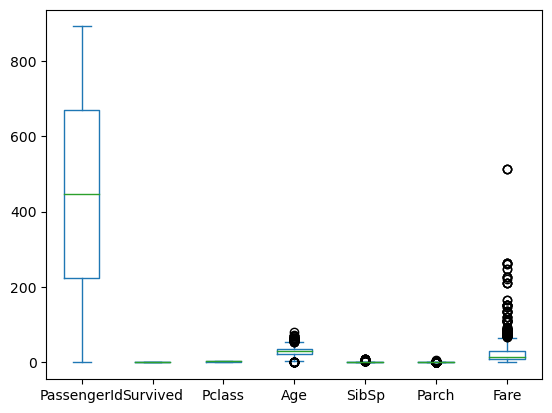

In [146]:
data.plot(kind='box')

<Axes: >

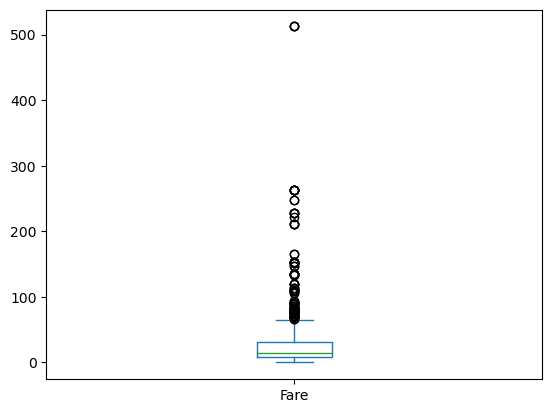

In [147]:
data['Fare'].plot(kind='box')

In [148]:
x = data.describe()

In [149]:
x

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [150]:
# IQR
out_min = x.loc['25%'] - ((x.loc['75%'] - x.loc['25%']) * 1.5) # 하한 최소값
out_max = x.loc['75%'] + ((x.loc['75%'] - x.loc['25%']) * 1.5) # 상한 최대값

In [151]:
ol_result = pd.DataFrame([out_max, out_min], columns=out_max.index, index=['상한값','하한값'])
ol_result

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
상한값,1336.0,2.5,4.5,54.5,2.5,0.0,65.6344
하한값,-444.0,-1.5,0.5,2.5,-1.5,0.0,-26.7240


In [152]:
result = pd.concat([x, ol_result])
result

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
상한값,1336.000000,2.500000,4.500000,54.500000,2.500000,0.000000,65.634400
하한값,-444.000000,-1.500000,0.500000,2.500000,-1.500000,0.000000,-26.724000


In [153]:
# 아웃라이어를 계산하는 함수
def outlier(x):
    x = x.describe()
    out_max = x.loc['75%'] + (1.5 * (x.loc['75%'] - x.loc['25%']))
    out_min = x.loc['25%'] - (1.5 * (x.loc['75%'] - x.loc['25%']))
    ol_result = pd.DataFrame([out_max, out_min], columns=out_max.index, index=['상한값','하한값'])
    result = pd.concat([x, ol_result])
    return result

In [154]:
outlier(data)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
상한값,1336.000000,2.500000,4.500000,54.500000,2.500000,0.000000,65.634400
하한값,-444.000000,-1.500000,0.500000,2.500000,-1.500000,0.000000,-26.724000


* Fare 컬럼에 이상값이 있음.
* 4분위수 로 계산해서 상한 최대값 이상인 컬럼만 필터링

In [155]:
data[data['Fare'] > 65.634400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,S


* 필터링 결과 Fare가 이상값을 갖는 데이터는 SibSp, Parch 컬럼에 1 이상의 데이터가 있음.
* SibSp: 형제, 자매 수, Parch: 부모자식
* 형제 자매나 부모 자식이 있는 경우 표를 한 사람이 다른 가족 구성원의 것 까지 같이 구매했을 가능성이 있음.
* SibSp, Parch를 family 컬럼으로 합치고 Fare를 그 수로 나누면 정상적인 Fare가격 산출 가능

 ### SibSp, Parch를 family 컬럼으로 합치기 (파생변수 만들기)

In [156]:
data['Family'] = data['SibSp'] + data['Parch'] + 1 # +1 하는 이유: 자기 자신 포함
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


### Fare를 Family수로 나누어 표 1개의 가격 산출 adj_fare 컬럼 생성

In [157]:
data['adj_fare'] = data['Fare'] / data['Family']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,adj_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,8.05000


In [158]:
outlier(data)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family,adj_fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602,19.916375
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.613459,35.841257
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,7.250000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,8.300000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,23.666667
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,512.329200
상한값,1336.000000,2.500000,4.500000,54.500000,2.500000,0.000000,65.634400,3.500000,48.291667
하한값,-444.000000,-1.500000,0.500000,2.500000,-1.500000,0.000000,-26.724000,-0.500000,-17.375000


In [159]:
data[data['adj_fare'] == 512.329200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,adj_fare
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,1,512.3292
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,1,512.3292


In [160]:
891 - data['Ticket'].nunique()

210

In [161]:
512.3292 / 2

256.1646

* 가장 비싼 1등실 가격은 256.1646

## Feature Engineering, Feature Selection
* 변수 선택
* 파생변수 생성

In [162]:
data[(data['Pclass'] == 1)]['adj_fare'].median()

33.760400000000004

* Fare는 불확실성이 커서 사용 불가
* Ticket, Fare, adj_fare 사용 불가

# 분석목적: 고객 정보를 통해 생존 여부 판별
* target변수(종속변수): Survived

* 분석에 사용할 변수 선택

In [163]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Family', 'adj_fare'],
      dtype='object')

In [164]:
data[['Survived', 'Pclass', 'Sex', 'Age','Embarked', 'Family']]

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,male,22.000000,S,2
1,1,1,female,38.000000,C,2
2,1,3,female,26.000000,S,1
3,1,1,female,35.000000,S,2
4,0,3,male,35.000000,S,1
...,...,...,...,...,...,...
886,0,2,male,27.000000,S,1
887,1,1,female,19.000000,S,1
888,0,3,female,29.699118,S,4
889,1,1,male,26.000000,C,1


### groupby를 통해서 독립변수와 종속변수의 관계 파악

In [165]:
data.groupby(['Pclass'])['Survived'].value_counts(sort = False)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,adj_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,8.05000


<Axes: xlabel='Pclass,Survived'>

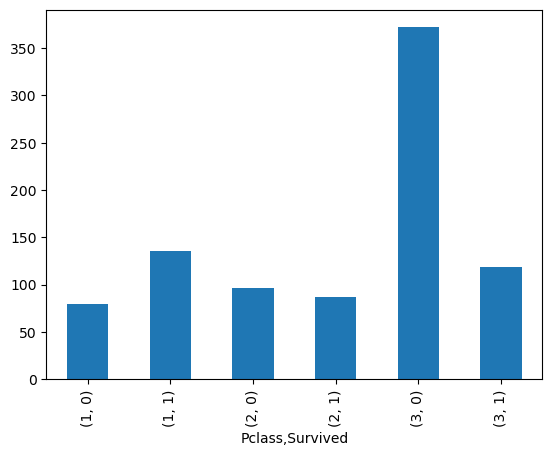

In [166]:
data.groupby(['Pclass'])['Survived'].value_counts(sort = False).plot(kind = 'bar')

* Pclass별 생존율 구하기

In [167]:
# Pclass가 1일 때 생존율 63%
136 / (80 + 136) * 100

62.96296296296296

In [168]:
# Pclass가 2일 때 생존율 47%
87 / (97 + 87) * 100

47.28260869565217

In [169]:
# Pclass가 1일 때 생존율 24%
119 / (372 + 119) * 100

24.236252545824847

* Pclass가 높으면(1등급) 생존률이 높다.

In [170]:
data.groupby('Sex')['Survived'].value_counts(sort = False)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: count, dtype: int64

In [171]:
# 여성일때의 생존률 74%
233 / (81 + 233) * 100

74.20382165605095

In [172]:
# 남성일때의 생존률 19%
109 / (468 + 109) * 100

18.890814558058924

* 여성인 경우 남성보다 생존률이 높다.

## 나이를 구간화 하고 생존율과의 관계 알아보기

In [173]:
data['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [174]:
def age_dist(x):
    for age in x:
        if 0 <= age < 10:
            return 'under 10s'
        elif 10 <= age < 20:
            return '10s'
        elif 20 <= age < 30:
            return '20s'
        elif 30 <= age < 40:
            return '30s'
        elif 40 <= age < 50:
            return '40s'
        elif 50 <= age < 60:
            return '50s'
        elif 60 <= age < 70:
            return '60s'
        elif 70 <= age < 80:
            return '70s'
        elif 80 <= age < 90:
            return '80s'

In [175]:
def age_dist(age):
        if 0 <= age < 10:
            return 'under 10s'
        elif 10 <= age < 20:
            return '10s'
        elif 20 <= age < 30:
            return '20s'
        elif 30 <= age < 40:
            return '30s'
        elif 40 <= age < 50:
            return '40s'
        elif 50 <= age < 60:
            return '50s'
        elif 60 <= age < 70:
            return '60s'
        elif 70 <= age < 80:
            return '70s'
        elif 80 <= age < 90:
            return '80s'

In [176]:
# 0 ~ 9, 10 ~ 19, 20 ~ 29, 30 ~ 39 ... 나이를 구간화

# data.loc[:, 'Age'] = data['Age'].apply(age_dist)
# data['Age'] = data['Age'].apply(age_dist)

In [177]:
data['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

## cut함수를 사용해 나이의 구간 나누기

In [184]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
data['Age'] = pd.cut(data['Age'], bins, right = False)

In [188]:
agedata = data.groupby('Age')['Survived'].value_counts(sort = False)
agedata

Age       Survived
[0, 10)   0            24
          1            38
[10, 20)  0            61
          1            41
[20, 30)  0           268
          1           129
[30, 40)  0            94
          1            73
[40, 50)  0            55
          1            34
[50, 60)  0            28
          1            20
[60, 70)  0            13
          1             6
[70, 80)  0             6
          1             0
Name: count, dtype: int64

In [199]:
agedata.loc[(0, 10)]

KeyError: (0, 10)

<Axes: xlabel='Age,Survived'>

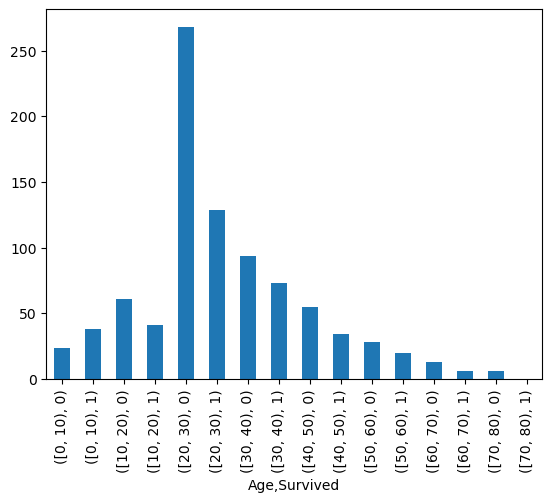

In [189]:
data.groupby('Age')['Survived'].value_counts(sort = False).plot(kind='bar')

In [82]:
# 10대 일때 생존률 40%
41 / (61 + 41) * 100

40.19607843137255

In [83]:
# 20대 일때 생존률 32%
129 / (268 + 129) * 100

32.49370277078086

In [85]:
# 30대 일때 생존률 43%
73 / (97 + 73) * 100

42.94117647058823

In [86]:
# 40대 일때 생존률 38%
34 / (55 + 34) * 100

38.20224719101123

In [87]:
# 50대 일때 생존률 42%
20 / (28 + 20) * 100

41.66666666666667

In [88]:
# 60대 일때 생존률 32% 
6 / (13 + 6) * 100

31.57894736842105

In [98]:
# 70대 일때 생존률 0%
0 / (6 + 0) * 100

0.0

In [92]:
# 80대 일때 생존률 100%
1 / 1 * 100

100.0

In [93]:
# 10살 미만일때 생존률 61%
38 / (24 + 38) * 100

61.29032258064516

* 나이는 생존율과 관련이 있다. 10세 미만인 경우와 80세 초과인 경우 생존율이 높다.